In [ ]:
from sklearn import datasets
import numpy as np
from time import perf_counter

In [84]:
# pomoć za merenje vremena izvršavanja
start_time = perf_counter()
for _ in range(10000):
    pass
print(f'elapsed time: {perf_counter() - start_time:.4f}')

elapsed time: 0.0006


In [ ]:
def create_datasets(n_samples: int = 1500) -> tuple[np.ndarray, np.ndarray, np.ndarray, np.ndarray, np.ndarray, np.ndarray]:
    '''
    Creates 6 2d synthetic datasets of different shapes and characteristics
    
    Returns:
    - a tuple of 6 datasets
    '''
    noisy_circles = datasets.make_circles(
        n_samples = n_samples, factor = 0.5, noise = 0.05, random_state = 170
    )
    noisy_moons = datasets.make_moons(n_samples = n_samples, noise = 0.05, random_state = 170)
    blobs = datasets.make_blobs(n_samples = n_samples, random_state = 170)
    rng = np.random.RandomState(170)
    no_structure = rng.rand(n_samples, 2), None

    # Anisotropicly distributed data
    X, y = datasets.make_blobs(n_samples = n_samples, random_state = 170)
    transformation = [[0.6, -0.6], [-0.4, 0.8]]
    X_aniso = np.dot(X, transformation)
    aniso = (X_aniso, y)

    # blobs with varied variances
    varied = datasets.make_blobs(
        n_samples = n_samples, cluster_std = [1.0, 2.5, 0.5], random_state = 170
    )
    return tuple(X for X, _ in (noisy_circles, noisy_moons, varied, aniso, blobs, no_structure))

In [86]:
Xs = create_datasets()
Xs

(array([[ 0.43859488,  0.21531641],
        [-0.42245291, -0.30543974],
        [-1.01248118,  0.0475593 ],
        ...,
        [ 0.02821554, -0.55498475],
        [ 0.94723713,  0.26827243],
        [ 0.0656399 ,  0.55372489]], shape=(1500, 2)),
 array([[ 0.06492798,  0.14921409],
        [ 1.29497185, -0.45712996],
        [ 0.03399991,  0.93749179],
        ...,
        [ 1.73315562, -0.2495898 ],
        [ 0.98678928,  0.11018118],
        [ 0.25003645, -0.10252756]], shape=(1500, 2)),
 array([[ -6.11119721,   1.47153062],
        [ -7.49665361,   0.9134251 ],
        [-10.84489837,  -7.55352273],
        ...,
        [  1.64990343,  -0.20117787],
        [  0.79230661,   0.60868888],
        [  1.91226342,   0.25327399]], shape=(1500, 2)),
 array([[-3.37561542,  3.63236314],
        [-3.61882807,  3.78627892],
        [-3.48552993,  0.46412084],
        ...,
        [ 1.17962827, -1.54262502],
        [-0.49738132,  0.78227797],
        [ 1.13089877, -1.13033403]], shape=(1500, 2

In [87]:
import pandas as pd


In [88]:
Xs[0]

array([[ 0.43859488,  0.21531641],
       [-0.42245291, -0.30543974],
       [-1.01248118,  0.0475593 ],
       ...,
       [ 0.02821554, -0.55498475],
       [ 0.94723713,  0.26827243],
       [ 0.0656399 ,  0.55372489]], shape=(1500, 2))

In [89]:
from sklearn.preprocessing import MinMaxScaler

In [90]:
mms = MinMaxScaler()

In [91]:
mms.fit(pd.DataFrame(Xs[0]))

,feature_range,"(0, ...)"
,copy,True
,clip,False


In [92]:
X = []
for i in range(len(Xs)):
    X.append(pd.DataFrame(Xs[i]))

X

[             0         1
 0     0.438595  0.215316
 1    -0.422453 -0.305440
 2    -1.012481  0.047559
 3     0.976358  0.038049
 4    -1.016175 -0.277860
 ...        ...       ...
 1495 -0.594704  0.857675
 1496 -0.339619 -0.335862
 1497  0.028216 -0.554985
 1498  0.947237  0.268272
 1499  0.065640  0.553725
 
 [1500 rows x 2 columns],
              0         1
 0     0.064928  0.149214
 1     1.294972 -0.457130
 2     0.034000  0.937492
 3     0.976778  0.021321
 4    -0.200670  0.992690
 ...        ...       ...
 1495  0.456091  0.964460
 1496  1.369932 -0.511053
 1497  1.733156 -0.249590
 1498  0.986789  0.110181
 1499  0.250036 -0.102528
 
 [1500 rows x 2 columns],
               0         1
 0     -6.111197  1.471531
 1     -7.496654  0.913425
 2    -10.844898 -7.553523
 3     -4.543377 -2.135686
 4     -1.913821 -0.034780
 ...         ...       ...
 1495  -8.527192 -6.726876
 1496  -3.271435  2.243791
 1497   1.649903 -0.201178
 1498   0.792307  0.608689
 1499   1.912263  0.253

In [93]:
for i in range(len(X)):
    X[i] = mms.fit_transform(X[i])

X

[array([[0.70527835, 0.59363173],
        [0.30359708, 0.35667461],
        [0.02834719, 0.51729803],
        ...,
        [0.51383521, 0.24312537],
        [0.94256142, 0.61772804],
        [0.53129378, 0.74761608]], shape=(1500, 2)),
 array([[0.36208609, 0.44065095],
        [0.74581255, 0.09023815],
        [0.35243772, 0.89620518],
        ...,
        [0.88250906, 0.21017786],
        [0.64967142, 0.41809341],
        [0.41983282, 0.29516672]], shape=(1500, 2)),
 array([[0.41964808, 0.64297797],
        [0.33858591, 0.60808324],
        [0.14268223, 0.07869976],
        ...,
        [0.87374514, 0.53839433],
        [0.8235677 , 0.58903006],
        [0.88909566, 0.56680826]], shape=(1500, 2)),
 array([[0.23623955, 0.80297565],
        [0.21152909, 0.81749917],
        [0.22507221, 0.50401986],
        ...,
        [0.6990534 , 0.31466304],
        [0.52866883, 0.53404121],
        [0.69410247, 0.35356688]], shape=(1500, 2)),
 array([[0.37039207, 0.78062387],
        [0.33830733, 0

In [95]:
from sklearn.cluster import AgglomerativeClustering

In [99]:
from matplotlib import pyplot as plt

In [100]:
from sklearn.metrics import silhouette_score

In [101]:
import time

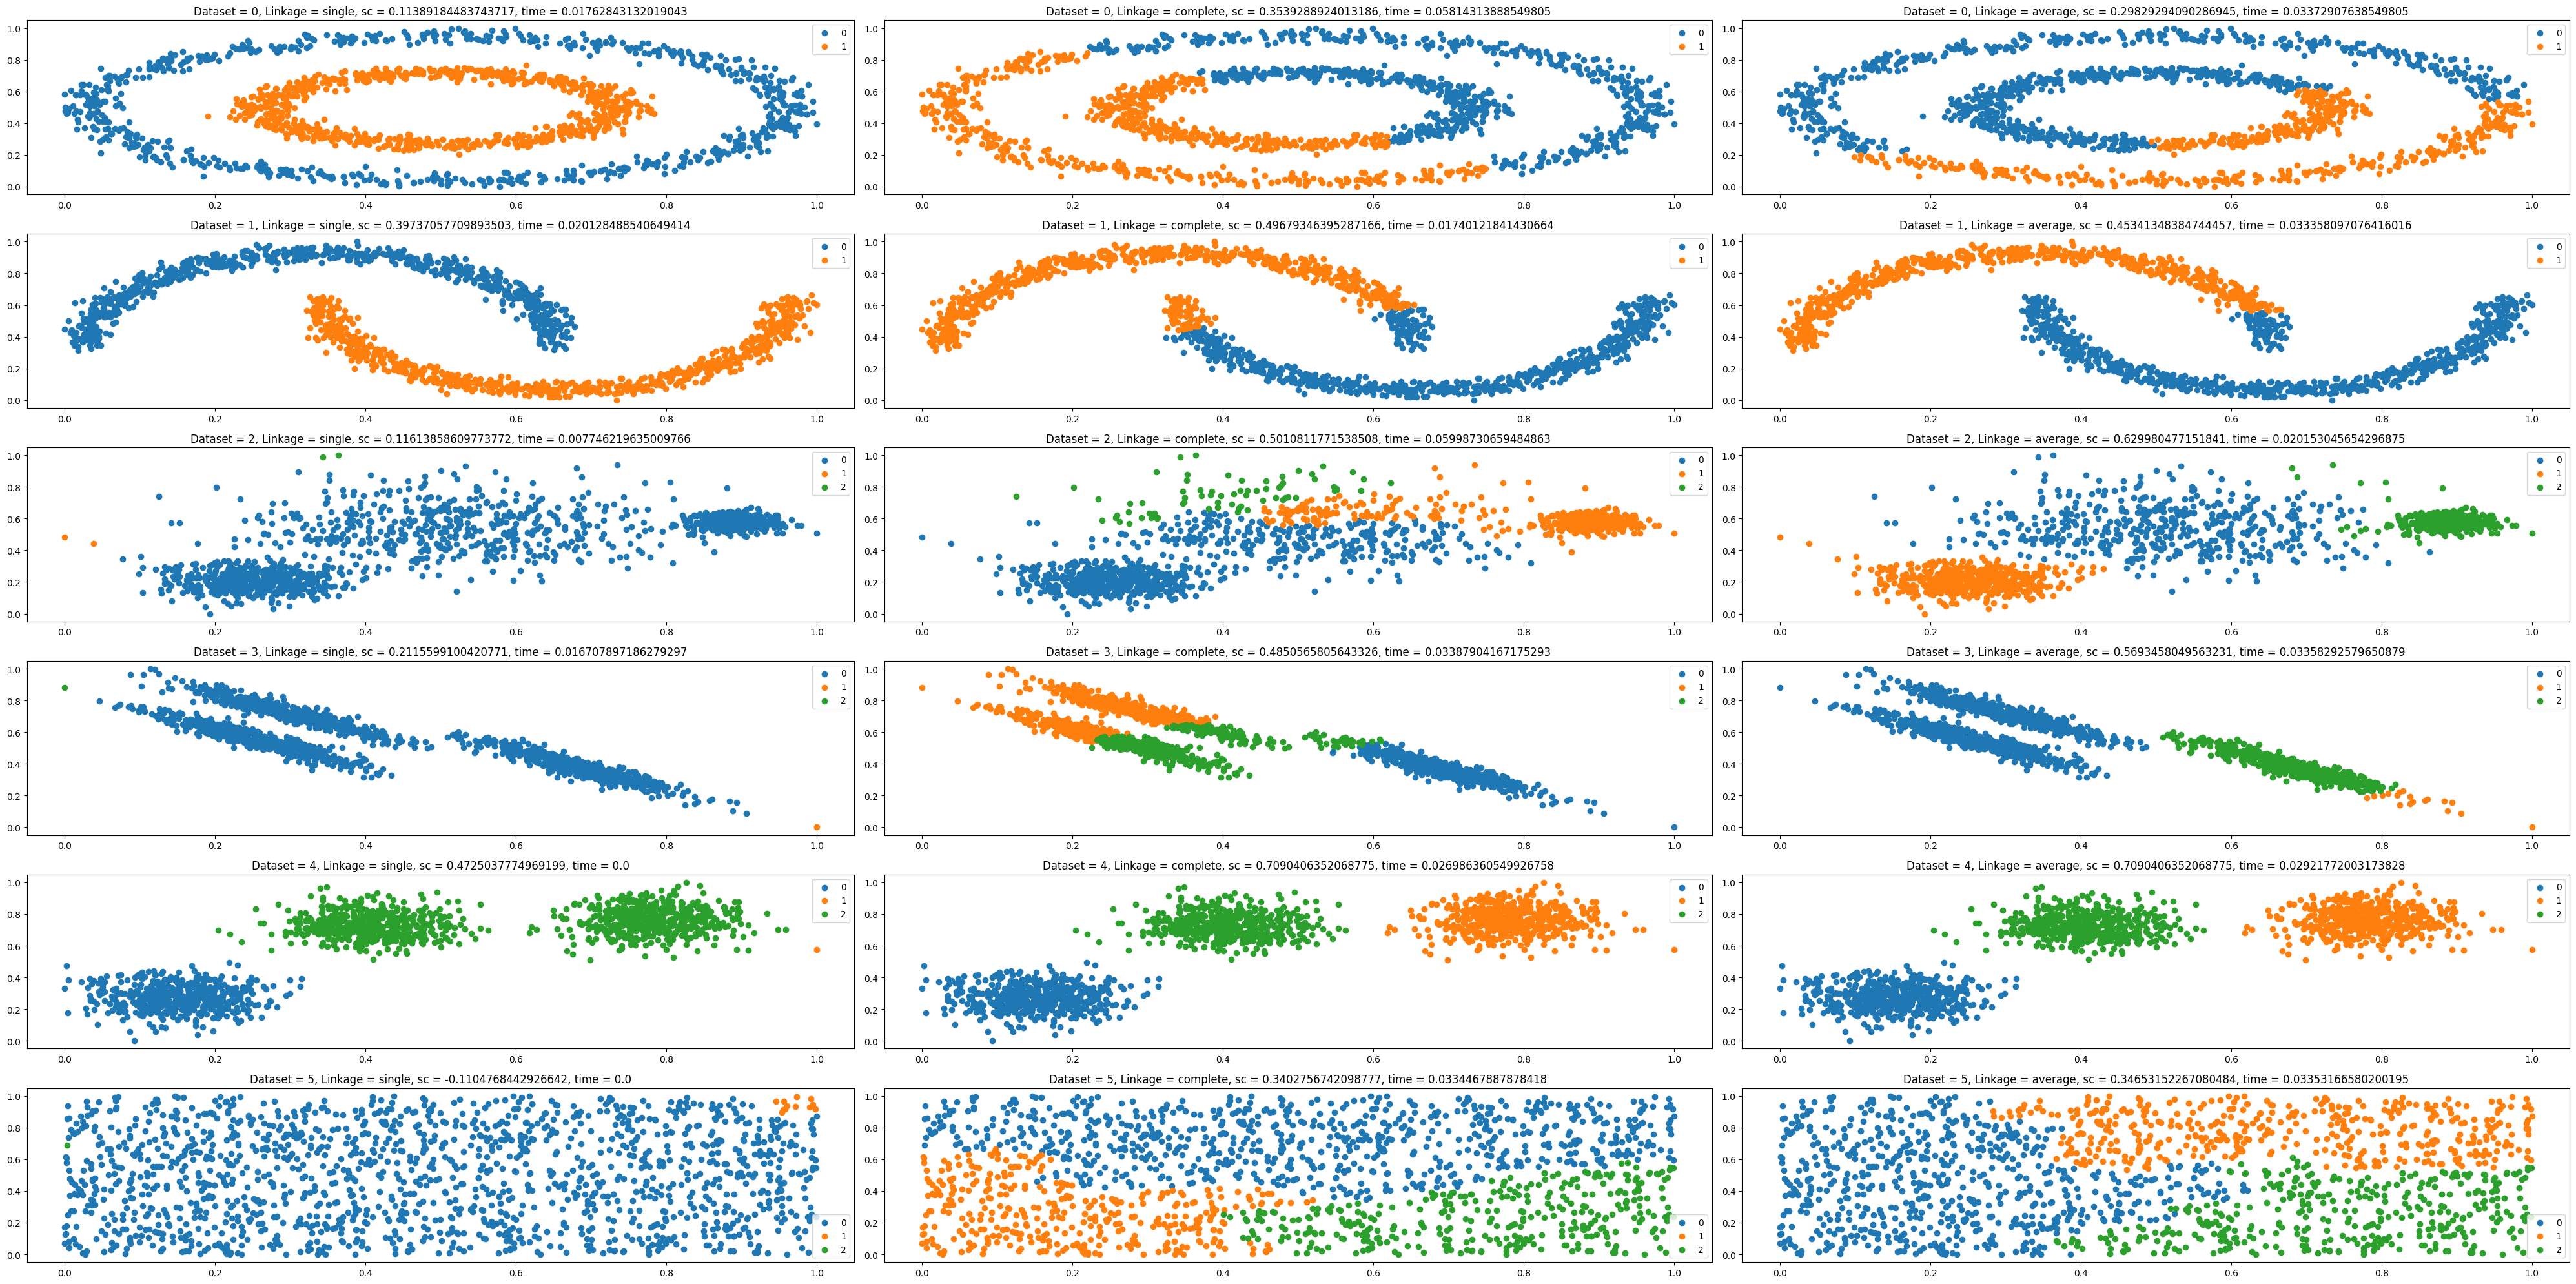

In [ ]:
ks = [2, 3]
linkage = ['single', 'complete', 'average']
fig = plt.figure(figsize = (40, 20))
idx = 1

for i in range(len(X)):
    for link in linkage:
        fig.add_subplot(6, 3, idx)

        if i < 2:
            model = AgglomerativeClustering(n_clusters = 2, linkage = link, compute_distances = True)

            start = time.time()
            model.fit(X[i])
            end = time.time()
            diff = end - start
            sc = silhouette_score(X[i], model.labels_)
            
            idx += 1

            for cluster in np.unique(model.labels_):
                elems = X[i][cluster == model.labels_]
                plt.scatter(elems[:, 0], elems[:, 1], label = f'{cluster}')

        else:
            model = AgglomerativeClustering(n_clusters = 3, linkage = link, compute_distances = True)

            start = time.time()
            model.fit(X[i])
            end = time.time()
            diff = end - start
            sc = silhouette_score(X[i], model.labels_)

            idx += 1

            for cluster in np.unique(model.labels_):
                elems = X[i][cluster == model.labels_]
                plt.scatter(elems[:, 0], elems[:, 1], label = f'{cluster}')

        
        plt.title(f'Dataset = {i}, Linkage = {link}, sc = {sc}, time = {diff}')
        plt.legend()
plt.tight_layout()


In [104]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [ ]:
Z = linkage(X[1], method = 'complete')

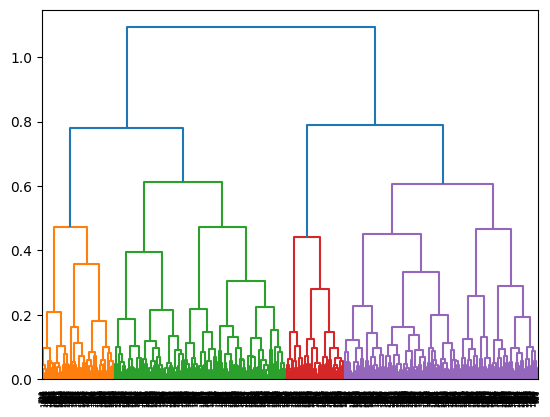

In [110]:
_ = dendrogram(Z)